## **`IMPORTS`**

In [ ]:
pip install pycountry_convert

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#LOADING DATA 





In [9]:
# read the csv file into the notebook
from google.colab import files
uploaded = files.upload()
#df=pd.read_csv("")

Saving netflix_titles.csv to netflix_titles.csv


In [10]:
netflix = pd.read_csv("netflix_titles.csv")
netflix.orig = netflix
nf_movies = netflix[netflix['type'] == 'Movie']
nf_movies.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


SELECTING COLUMNS WHICH HELPS TO FIND THE BEST MOVIES.

In [11]:
nf = nf_movies[['title', 'release_year', 'listed_in', 'country']]
nf = nf.rename(columns={'release_year': 'year'})
nf.head()

,title,year,listed_in,country
1,7:19,2016,"Dramas, International Movies",Mexico
2,23:59,2011,"Horror Movies, International Movies",Singapore
3,9,2009,"Action & Adventure, Independent Movies, Sci-Fi...",United States
4,21,2008,Dramas,United States
6,122,2019,"Horror Movies, International Movies",Egypt


In [12]:
from google.colab import files
uploaded = files.upload()

Saving IMDb movies.csv to IMDb movies.csv


In [13]:
from google.colab import files
uploaded = files.upload()

Saving IMDb ratings.csv to IMDb ratings.csv


In [14]:
imdb_movies = pd.read_csv("IMDb movies.csv")
imdb_movies = imdb_movies[['imdb_title_id', 'title', 'year']]
imdb_ratings = pd.read_csv("IMDb ratings.csv")
imdb = pd.merge(imdb_movies, imdb_ratings, on='imdb_title_id')
imdb.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,imdb_title_id,title,year,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,Miss Jerry,1894,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,7.2,4.0,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,7.0,1.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,The Story of the Kelly Gang,1906,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.0,1.0,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.0,1.0,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,NaN,NaN,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,Den sorte drøm,1911,5.8,188,6.0,6.0,6,6,17,44,52,32,16,5,6,4,NaN,NaN,5.5,25.0,5.8,72.0,6.2,62.0,5.9,146.0,NaN,NaN,5.5,21.0,5.9,67.0,6.2,55.0,5.7,15.0,NaN,NaN,5.8,4.0,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,Cleopatra,1912,5.2,446,5.3,5.0,15,8,16,62,98,117,63,26,25,16,NaN,NaN,5.3,23.0,5.0,111.0,5.3,193.0,5.1,299.0,NaN,NaN,5.2,20.0,4.9,96.0,5.2,171.0,5.9,39.0,NaN,NaN,5.7,3.0,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,L'Inferno,1911,7.0,2237,6.9,7.0,210,225,436,641,344,169,66,39,20,87,7.5,4.0,7.0,402.0,7.0,895.0,7.1,482.0,7.0,1607.0,8.0,2.0,7.0,346.0,7.0,804.0,7.0,396.0,7.2,215.0,7.0,2.0,7.0,52.0,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [15]:
imdb.shape

(85855, 51)

In [16]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85855 entries, 0 to 85854
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imdb_title_id              85855 non-null  object 
 1   title                      85855 non-null  object 
 2   year                       85855 non-null  object 
 3   weighted_average_vote      85855 non-null  float64
 4   total_votes                85855 non-null  int64  
 5   mean_vote                  85855 non-null  float64
 6   median_vote                85855 non-null  float64
 7   votes_10                   85855 non-null  int64  
 8   votes_9                    85855 non-null  int64  
 9   votes_8                    85855 non-null  int64  
 10  votes_7                    85855 non-null  int64  
 11  votes_6                    85855 non-null  int64  
 12  votes_5                    85855 non-null  int64  
 13  votes_4                    85855 non-null  int

CHOOSING ONLY 31 COLUMNS FOR FURTHER ANALYSIS

In [17]:
imdb = imdb[['imdb_title_id', 'title', 'year', 'weighted_average_vote', 'allgenders_0age_avg_vote', 'allgenders_0age_votes', 'allgenders_18age_avg_vote', 'allgenders_18age_votes',
             'allgenders_30age_avg_vote', 'allgenders_30age_votes', 'allgenders_45age_avg_vote', 'allgenders_45age_votes',
             'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote', 'males_0age_votes',
             'males_18age_avg_vote', 'males_18age_votes', 'males_30age_avg_vote', 'males_30age_votes', 
             'males_45age_avg_vote', 'males_45age_votes', 'females_allages_avg_vote', 'females_allages_votes',
             'females_0age_avg_vote', 'females_0age_votes', 'females_18age_avg_vote', 'females_18age_votes',
             'females_30age_avg_vote', 'females_30age_votes', 'females_45age_avg_vote', 'females_45age_votes']]
imdb = imdb.fillna(0)

In [18]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85855 entries, 0 to 85854
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imdb_title_id              85855 non-null  object 
 1   title                      85855 non-null  object 
 2   year                       85855 non-null  object 
 3   weighted_average_vote      85855 non-null  float64
 4   allgenders_0age_avg_vote   85855 non-null  float64
 5   allgenders_0age_votes      85855 non-null  float64
 6   allgenders_18age_avg_vote  85855 non-null  float64
 7   allgenders_18age_votes     85855 non-null  float64
 8   allgenders_30age_avg_vote  85855 non-null  float64
 9   allgenders_30age_votes     85855 non-null  float64
 10  allgenders_45age_avg_vote  85855 non-null  float64
 11  allgenders_45age_votes     85855 non-null  float64
 12  males_allages_avg_vote     85855 non-null  float64
 13  males_allages_votes        85855 non-null  flo

CALCULATING WEIGHTED AVERAGE RATINGS 

In [19]:
imdb.describe()

,weighted_average_vote,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes
count,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,8.585500e+04,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.00000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000,85855.000000
mean,5.898656,2.407122,5.870258,5.961882,1763.746969,5.862234,4053.454941,5.672904,1259.532072,5.817104,6.028945e+03,1.986314,3.970765,5.844922,1320.306610,5.816954,3324.204647,5.623527,1049.960247,6.033710,1365.46999,1.583600,1.247569,5.841367,411.267474,6.004468,678.116475,5.825962,189.675604
std,1.234987,3.232165,46.720873,1.533180,11750.643926,1.280932,22086.576134,1.261999,5361.237732,1.248209,3.364633e+04,3.067543,32.542647,1.643250,9042.807034,1.291011,18347.259731,1.277966,4471.165728,1.358325,7669.16993,2.852373,8.414649,2.366198,2722.980106,1.578850,3712.488564,1.855638,829.859923
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.200000,0.000000,0.000000,5.200000,13.000000,5.100000,69.000000,5.000000,53.000000,5.100000,1.320000e+02,0.000000,0.000000,5.100000,9.000000,5.100000,56.000000,4.900000,45.000000,5.300000,22.00000,0.000000,0.000000,5.000000,3.000000,5.200000,9.000000,5.000000,6.000000
50%,6.100000,0.000000,0.000000,6.200000,42.000000,6.100000,172.000000,5.900000,123.000000,6.000000,3.080000e+02,0.000000,0.000000,6.100000,29.000000,6.000000,140.000000,5.900000,104.000000,6.300000,58.00000,0.000000,0.000000,6.400000,9.000000,6.300000,26.000000,6.200000,15.000000
75%,6.800000,5.700000,2.000000,7.000000,193.000000,6.800000,678.000000,6.600000,425.000000,6.700000,1.141000e+03,5.000000,1.000000,7.000000,140.000000,6.700000,555.000000,6.500000,357.000000,7.000000,227.00000,1.000000,1.000000,7.300000,40.000000,7.000000,107.000000,7.000000,59.000000
max,9.900000,10.000000,2761.000000,10.000000,522182.000000,10.000000,879620.000000,10.000000,204278.000000,10.000000,1.409165e+06,10.000000,1872.000000,10.000000,422587.000000,10.000000,743676.000000,10.000000,165852.000000,10.000000,278964.00000,10.000000,630.000000,10.000000,107833.000000,10.000000,129249.000000,10.000000,34317.000000


In [20]:
imdb.shape

(85855, 32)

In [21]:
def weighted_averages(number, avg, row):
    if row[number] != 0.0:
        wr = ((row[number]/(row[number]+1000))*row[avg]) + ((1000/(row[number]+1000))*5.9)
    else:
        wr = 0
    return wr
    
weighted_allgenders_0age = []
weighted_allgenders_18age = []
weighted_allgenders_30age = []
weighted_allgenders_45age = []
weighted_males_allages = []
weighted_males_0age = []
weighted_males_18age = []
weighted_males_30age = []
weighted_males_45age = []
weighted_females_allages = []
weighted_females_0age = []
weighted_females_18age = []
weighted_females_30age = []
weighted_females_45age = []

for i in range(len(imdb)):
    weighted_allgenders_0age.append(weighted_averages('allgenders_0age_votes', 'allgenders_0age_avg_vote', imdb.iloc[i]))
    weighted_allgenders_18age.append(weighted_averages('allgenders_18age_votes', 'allgenders_18age_avg_vote', imdb.iloc[i]))
    weighted_allgenders_30age.append(weighted_averages('allgenders_30age_votes', 'allgenders_30age_avg_vote', imdb.iloc[i]))
    weighted_allgenders_45age.append(weighted_averages('allgenders_45age_votes', 'allgenders_45age_avg_vote', imdb.iloc[i]))
    weighted_males_allages.append(weighted_averages('males_allages_votes', 'males_allages_avg_vote', imdb.iloc[i]))
    weighted_males_0age.append(weighted_averages('males_0age_votes', 'males_0age_avg_vote', imdb.iloc[i]))
    weighted_males_18age.append(weighted_averages('males_18age_votes', 'males_18age_avg_vote', imdb.iloc[i]))
    weighted_males_30age.append(weighted_averages('males_30age_votes', 'males_30age_avg_vote', imdb.iloc[i]))
    weighted_males_45age.append(weighted_averages('males_45age_votes', 'males_45age_avg_vote', imdb.iloc[i]))
    weighted_females_allages.append(weighted_averages('females_allages_votes', 'females_allages_avg_vote', imdb.iloc[i]))
    weighted_females_0age.append(weighted_averages('females_0age_votes', 'females_0age_avg_vote', imdb.iloc[i]))
    weighted_females_18age.append(weighted_averages('females_18age_votes', 'females_18age_avg_vote', imdb.iloc[i]))
    weighted_females_30age.append(weighted_averages('females_30age_votes', 'females_30age_avg_vote', imdb.iloc[i]))
    weighted_females_45age.append(weighted_averages('females_45age_votes', 'females_45age_avg_vote', imdb.iloc[i]))
    
imdb['weighted_allgenders_0age'] = weighted_allgenders_0age
imdb['weighted_allgenders_18age'] = weighted_allgenders_18age
imdb['weighted_allgenders_30age'] = weighted_allgenders_30age
imdb['weighted_allgenders_45age'] = weighted_allgenders_45age
imdb['weighted_males_allages'] = weighted_males_allages
imdb['weighted_males_0age'] = weighted_males_0age
imdb['weighted_males_18age'] = weighted_males_18age
imdb['weighted_males_30age'] = weighted_males_30age
imdb['weighted_males_45age'] = weighted_males_45age
imdb['weighted_females_allages'] = weighted_females_allages
imdb['weighted_females_0age'] = weighted_females_0age
imdb['weighted_females_18age'] = weighted_females_18age
imdb['weighted_females_30age'] = weighted_females_30age
imdb['weighted_females_45age'] = weighted_females_45age

imdb = imdb[['imdb_title_id', 'title', 'year', 'weighted_average_vote', 'weighted_allgenders_0age', 'weighted_allgenders_18age', 'weighted_allgenders_30age', 'weighted_allgenders_45age',
            'weighted_males_allages', 'weighted_males_0age', 'weighted_males_18age', 'weighted_males_30age', 'weighted_males_45age',
            'weighted_females_allages', 'weighted_females_0age', 'weighted_females_18age', 'weighted_females_30age', 'weighted_females_45age']]

In [22]:
imdb.head()

,imdb_title_id,title,year,weighted_average_vote,weighted_allgenders_0age,weighted_allgenders_18age,weighted_allgenders_30age,weighted_allgenders_45age,weighted_males_allages,weighted_males_0age,weighted_males_18age,weighted_males_30age,weighted_males_45age,weighted_females_allages,weighted_females_0age,weighted_females_18age,weighted_females_30age,weighted_females_45age
0,tt0000009,Miss Jerry,1894,5.9,5.905179,5.903661,5.890476,5.923671,5.926527,5.901099,5.900000,5.889575,5.924054,5.903382,5.904187,5.900000,5.897433,5.894422
1,tt0000574,The Story of the Kelly Gang,1906,6.1,5.900100,5.920467,5.919290,5.941256,5.959649,5.900100,5.927768,5.917355,5.927273,5.914286,0.000000,5.900000,5.906745,5.909665
2,tt0001892,Den sorte drøm,1911,5.8,0.000000,5.890244,5.893284,5.917514,5.900000,0.000000,5.891773,5.900000,5.915640,5.897044,0.000000,5.899602,5.899602,5.906256
3,tt0002101,Cleopatra,1912,5.2,0.000000,5.886510,5.810081,5.802934,5.715858,0.000000,5.886275,5.812409,5.797780,5.900000,0.000000,5.899402,5.894477,5.904114
4,tt0002130,L'Inferno,1911,7.0,5.906375,6.215407,6.419525,6.290283,6.578059,5.904192,6.182764,6.390244,6.212034,6.130041,5.902196,5.954373,6.006100,6.007242


DATASET MERGE

In [23]:
merged = nf.merge(imdb, how="inner", left_on=['title', 'year'], right_on=['title', 'year'])
merged.head()

,title,year,listed_in,country,imdb_title_id,weighted_average_vote,weighted_allgenders_0age,weighted_allgenders_18age,weighted_allgenders_30age,weighted_allgenders_45age,weighted_males_allages,weighted_males_0age,weighted_males_18age,weighted_males_30age,weighted_males_45age,weighted_females_allages,weighted_females_0age,weighted_females_18age,weighted_females_30age,weighted_females_45age
0,23:59,2011,"Horror Movies, International Movies",Singapore,tt2100376,4.6,5.895105,5.725088,5.623970,5.689465,5.421659,5.895105,5.776147,5.646372,5.693849,5.795048,0.000000,5.847449,5.864440,5.878035
1,9,2009,"Action & Adventure, Independent Movies, Sci-Fi...",United States,tt0472033,7.1,5.981640,7.055726,6.984109,7.017298,6.988049,5.960399,7.041855,6.980945,7.004966,7.136228,5.916568,7.104086,7.089831,6.711645
2,21,2008,Dramas,United States,tt0478087,6.8,5.936641,6.979383,6.693032,6.562246,6.794374,5.918041,6.973781,6.691813,6.556476,6.867851,5.910704,6.997119,6.747093,6.518838
3,1920,2008,"Horror Movies, International Movies, Thrillers",India,tt1301698,6.4,5.904096,6.177766,6.109886,5.840917,6.233666,5.904096,6.166667,6.100100,5.825953,5.934025,0.000000,5.927410,5.891158,5.908738
4,Æon Flux,2005,"Action & Adventure, Sci-Fi & Fantasy",United States,tt0402022,5.5,5.876529,5.432285,5.407310,5.709869,5.405627,5.875248,5.440994,5.310312,5.711280,5.806063,5.904382,5.900000,5.719010,5.900000


In [82]:
list(merged.columns)

['title',
 'year',
 'listed_in',
 'country',
 'imdb_title_id',
 'weighted_average_vote',
 'weighted_allgenders_0age',
 'weighted_allgenders_18age',
 'weighted_allgenders_30age',
 'weighted_allgenders_45age',
 'weighted_males_allages',
 'weighted_males_0age',
 'weighted_males_18age',
 'weighted_males_30age',
 'weighted_males_45age',
 'weighted_females_allages',
 'weighted_females_0age',
 'weighted_females_18age',
 'weighted_females_30age',
 'weighted_females_45age']

In [24]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620 entries, 0 to 619
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      620 non-null    object 
 1   year                       620 non-null    object 
 2   listed_in                  620 non-null    object 
 3   country                    616 non-null    object 
 4   imdb_title_id              620 non-null    object 
 5   weighted_average_vote      620 non-null    float64
 6   weighted_allgenders_0age   620 non-null    float64
 7   weighted_allgenders_18age  620 non-null    float64
 8   weighted_allgenders_30age  620 non-null    float64
 9   weighted_allgenders_45age  620 non-null    float64
 10  weighted_males_allages     620 non-null    float64
 11  weighted_males_0age        620 non-null    float64
 12  weighted_males_18age       620 non-null    float64
 13  weighted_males_30age       620 non-null    float64

Country variable has 4 rows missing and to fill that up, I will forst find wheich movies have missing countries and then replace it with its repective movie names by googling the which country the movie belongs to 

In [25]:
merged[merged['country'].isnull()]

,title,year,listed_in,country,imdb_title_id,weighted_average_vote,weighted_allgenders_0age,weighted_allgenders_18age,weighted_allgenders_30age,weighted_allgenders_45age,weighted_males_allages,weighted_males_0age,weighted_males_18age,weighted_males_30age,weighted_males_45age,weighted_females_allages,weighted_females_0age,weighted_females_18age,weighted_females_30age,weighted_females_45age
6,3 Deewarein,2003,"Dramas, International Movies, Thrillers",NaN,tt0338490,7.8,0.000000,6.271440,7.053618,5.977346,7.085177,0.000000,6.248980,7.007939,5.925632,6.182979,0.000000,5.930059,6.081295,5.971014
74,Been So Long,2018,"Dramas, International Movies, Music & Musicals",NaN,tt1682886,5.4,5.893035,5.859516,5.781541,5.796460,5.688600,5.899202,5.865116,5.793655,5.803956,5.900000,5.888335,5.892678,5.878891,5.916123
260,Jis Desh Men Ganga Behti Hai,1960,"Action & Adventure, Dramas, International Movies",NaN,tt0053965,7.4,0.000000,5.962846,6.173826,5.874532,6.152881,0.000000,5.951252,6.110232,5.867108,5.994269,0.000000,5.915164,5.970817,5.904950
506,Tanda Tanya,2011,"Dramas, International Movies",NaN,tt1979169,7.1,0.000000,5.977456,5.966293,5.894632,6.013453,0.000000,5.952772,5.954820,5.897015,5.935680,0.000000,5.922483,5.916683,5.898102


In [26]:
merged.loc[6, 'country'] = 'India'
merged.loc[74, 'country'] = 'United Kingdom'
merged.loc[260, 'country'] = 'India'
merged.loc[506, 'country'] = 'Indonesia'

#SQL

In [27]:
import sqlite3

In [28]:
conn = sqlite3.connect("merge.db")
print(conn)

In [29]:
conn.execute("DROP TABLE IF EXISTS `merge3`")
print("Table dropped")

Table dropped


In [30]:
conn = sqlite3.connect("merge.db")
try:
  conn.execute('''
      CREATE TABLE merge3
      (title                       TEXT    NOT NULL,
       year                        TEXT    NOT NULL,
       listed_in                   TEXT    NOT NULL,
       country                     TEXT    NOT NULL,
       imdb_title_id               TEXT PRIMARY KEY, 
       weighted_average_vote       FLOAT DEFAULT 0,
       weighted_allgenders_0age    FLOAT DEFAULT 0,
       weighted_allgenders_18age   FLOAT DEFAULT 0, 
       weighted_allgenders_30age   FLOAT DEFAULT 0,
       weighted_allgenders_45age   FLOAT DEFAULT 0,
       weighted_males_allages      FLOAT DEFAULT 0,
       weighted_males_0age         FLOAT DEFAULT 0,
       weighted_males_18age        FLOAT DEFAULT 0,
       weighted_males_30age        FLOAT DEFAULT 0,
       weighted_males_45age        FLOAT DEFAULT 0,
       weighted_females_allages    FLOAT DEFAULT 0,
       weighted_females_0age       FLOAT DEFAULT 0,
       weighted_females_18age      FLOAT DEFAULT 0,
       weighted_females_30age      FLOAT DEFAULT 0,
       weighted_females_45age      FLOAT DEFAULT 0
       );''')
  print("Table created successfully")
except Exception as e:
  print(str(e))
  print('Table creation failed!!!')
finally:
  conn.close()

Table created successfully


In [31]:
films_list = merged.values.tolist()
films_list

[['23:59',
  2011,
  'Horror Movies, International Movies',
  'Singapore',
  'tt2100376',
  4.6,
  5.895104895104896,
  5.725088339222615,
  5.623970037453184,
  5.68946474086661,
  5.421658986175116,
  5.895104895104896,
  5.776146788990826,
  5.646372239747635,
  5.6938488576449915,
  5.795047784535186,
  0.0,
  5.847449470644851,
  5.864440263405457,
  5.8780346820809255],
 ['9',
  2009,
  'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
  'United States',
  'tt0472033',
  7.1,
  5.981640260950606,
  7.055726092089728,
  6.984108639121642,
  7.017298414886286,
  6.988049193863804,
  5.960398860398861,
  7.041854830894467,
  6.98094512195122,
  7.00496555001188,
  7.136227618346823,
  5.916568047337279,
  7.104086202071088,
  7.089830508474576,
  6.711645379413975],
 ['21',
  2008,
  'Dramas',
  'United States',
  'tt0478087',
  6.8,
  5.936641221374046,
  6.979382602665267,
  6.693032208615675,
  6.562245833558061,
  6.794374402280242,
  5.9180407371484005,
  6.9737814324

In [ ]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

# export the dataframe as a table 'playstore' to the sqlite engine
merged.to_sql("merge", con =engine)

In [32]:
conn = sqlite3.connect("merge.db")

cursor = conn.cursor()

try:
  cursor.executemany('''
        INSERT INTO merge3 (title, year, listed_in, country, imdb_title_id, weighted_average_vote, weighted_allgenders_0age, weighted_allgenders_18age, weighted_allgenders_30age, 
        weighted_allgenders_45age, weighted_males_allages, weighted_males_0age, weighted_males_18age, weighted_males_30age, weighted_males_45age,
        weighted_females_allages, weighted_females_0age, weighted_females_18age, weighted_females_30age, weighted_females_45age)
        VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)''', films_list)
  conn.commit()
  print("Data Insterted successfully")
except Exception as e:
  print(str(e))
  print("Insertion failed!")
finally:
  conn.close()

Data Insterted successfully


In [33]:
conn = sqlite3.connect("merge.db")
cursor = conn.cursor()
cursor.execute("SELECT country FROM merge3;")
rows = cursor.fetchall()
for row in rows:
  print(row)

('Singapore',)
('United States',)
('United States',)
('India',)
('United States',)
('United States, France, Serbia',)
('India',)
('India',)
('United States',)
('India',)
('United States',)
('United States, Canada',)
('United States',)
('Philippines',)
('United States',)
('United Kingdom',)
('United States',)
('United States, United Kingdom, France',)
('United States',)
('Taiwan',)
('Philippines',)
('India',)
('United States',)
('India',)
('India',)
('India',)
('India',)
('Hong Kong',)
('United States, United Kingdom',)
('United States',)
('India',)
('United States',)
('United States, Chile',)
('India',)
('India',)
('India',)
('India',)
('India',)
('Uruguay, Argentina',)
('Soviet Union, India',)
('United States',)
('United States',)
('India',)
('United States',)
('United States',)
('United States',)
('United States, Canada',)
('India',)
('Serbia, United States',)
('India',)
('India',)
('India',)
('India',)
('United States, Canada',)
('India',)
('India',)
('Romania, France, Switzerland, 

In [48]:
conn = sqlite3.connect("merge.db")
cursor = conn.cursor()
cursor.execute("SELECT country, count(*) FROM merge3 GROUP BY country;")
rows = cursor.fetchall()
for row in rows:
  print(row)

('Argentina', 2)
('Argentina, Spain', 1)
('Australia', 5)
('Brazil, France, Germany', 1)
('Bulgaria, United States, Spain, Canada', 1)
('Canada', 2)
('Canada, Germany, France, United States', 1)
('Canada, United States', 3)
('Canada, United States, Germany', 1)
('China', 1)
('Czech Republic, United Kingdom, France', 1)
('Egypt', 2)
('France, Belgium', 1)
('France, Belgium, United States', 1)
('France, United Kingdom, United States', 1)
('France, United States', 1)
('France, United States, Mexico', 1)
('Germany', 1)
('Germany, Canada, United States', 1)
('Germany, France, United States, Canada, United Kingdom', 1)
('Germany, United States', 2)
('Germany, United States, France', 1)
('Germany, United States, Hong Kong, Singapore', 1)
('Hong Kong', 3)
('Hong Kong, China', 3)
('Hong Kong, United States', 1)
('India', 253)
('India, Australia', 1)
('India, France', 1)
('India, Germany', 1)
('India, Japan', 2)
('India, Pakistan', 1)
('India, Soviet Union', 1)
('India, United States', 1)
('Indo

In [35]:
conn = sqlite3.connect("merge.db")
df = pd.read_sql_query("SELECT title, count(*) FROM merge3 GROUP BY title;", conn)
df.head()


,title,count(*)
0,1920,1
1,21,1
2,23:59,1
3,3 Days to Kill,1
4,3 Deewarein,1


In [68]:
conn = sqlite3.connect("merge.db")
df = pd.read_sql_query("SELECT title, listed_in FROM merge3 WHERE year BETWEEN 1958 AND 2012", conn)
df.head()


,title,listed_in
0,23:59,"Horror Movies, International Movies"
1,9,"Action & Adventure, Independent Movies, Sci-Fi..."
2,21,Dramas
3,1920,"Horror Movies, International Movies, Thrillers"
4,Æon Flux,"Action & Adventure, Sci-Fi & Fantasy"


In [60]:
conn = sqlite3.connect("merge.db")
df = pd.read_sql_query("SELECT country FROM merge3 WHERE year IS NOT NULL;", conn)
df.head()


,country
0,Singapore
1,United States
2,United States
3,India
4,United States


In [61]:
conn = sqlite3.connect("merge.db")
df = pd.read_sql_query("SELECT title, country FROM merge3 WHERE country LIKE 'A%';", conn)
df.head()

,title,country
0,Head On,Australia
1,Kath & Kimderella,Australia
2,Palermo Hollywood,Argentina
3,"Pizza, birra, faso",Argentina
4,The Interview,Australia


In [62]:
conn = sqlite3.connect("merge.db")
df = pd.read_sql_query("SELECT DISTINCT country FROM merge3;", conn)
df.head()

,country
0,Singapore
1,United States
2,India
3,"United States, France, Serbia"
4,"United States, Canada"


In [64]:
conn = sqlite3.connect("merge.db")
df = pd.read_sql_query("SELECT title FROM merge3 ORDER BY year DESC;", conn)
df.head()

,title
0,Bheeshma
1,Bulbbul
2,Class of '83
3,Crazy Awesome Teachers
4,Dangerous Lies


In [65]:
conn = sqlite3.connect("merge.db")
df = pd.read_sql_query("SELECT listed_in, count(*) FROM merge3 GROUP BY listed_in;", conn)
df.head()

,listed_in,count(*)
0,Action & Adventure,15
1,"Action & Adventure, Anime Features, Internatio...",2
2,"Action & Adventure, Classic Movies, Comedies",1
3,"Action & Adventure, Classic Movies, Cult Movies",1
4,"Action & Adventure, Classic Movies, Dramas",2


In [66]:
conn = sqlite3.connect("merge.db")
df = pd.read_sql_query("SELECT MIN(year) FROM merge3;", conn)
df.head()

,MIN(year)
0,1958


In [67]:
conn = sqlite3.connect("merge.db")
df = pd.read_sql_query("SELECT MAX(year) FROM merge3;", conn)
df.head()

,MAX(year)
0,2020


#EXPLORATORY ANALYSIS AND DATA VISUALIZATION, DESCRIPTIVE STATISTICS

#Top Movies by Age and Gender groups

In [36]:
def top10(column, group):
    titles = []
    scores = []
    top10=merged[column].nlargest(10)
    for i in range(len(top10)):
        index = top10.index[i]
        score = top10.iloc[i]
        scores.append(score)
        title = merged['title'].iloc[index]
        titles.append(title)
        print(i+1, '.', title, ':', score)
    sns.set(rc={'figure.figsize':(12,10)})
    ax = sns.barplot(x=titles, y=scores, data=merged, palette=("crest_d"))
    ticks = ax.set_xticklabels(titles, rotation=90, size = 12)
    ticks = ax.set_yticklabels(ax.get_yticks(), size = 12)
    ax.set(xlabel='Movie Title', ylabel='Mean Rating')
    ax.set_title('Best Rated Movies on Netflix' + group, size= 20)
    return ax

1 . Pulp Fiction : 8.9
2 . Schindler's List : 8.9
3 . Inception : 8.8
4 . City of God : 8.6
5 . Gol Maal : 8.6
6 . Koshish : 8.6
7 . Oththa Seruppu Size 7 : 8.6
8 . American History X : 8.5
9 . Black Friday : 8.5
10 . 3 Idiots : 8.4


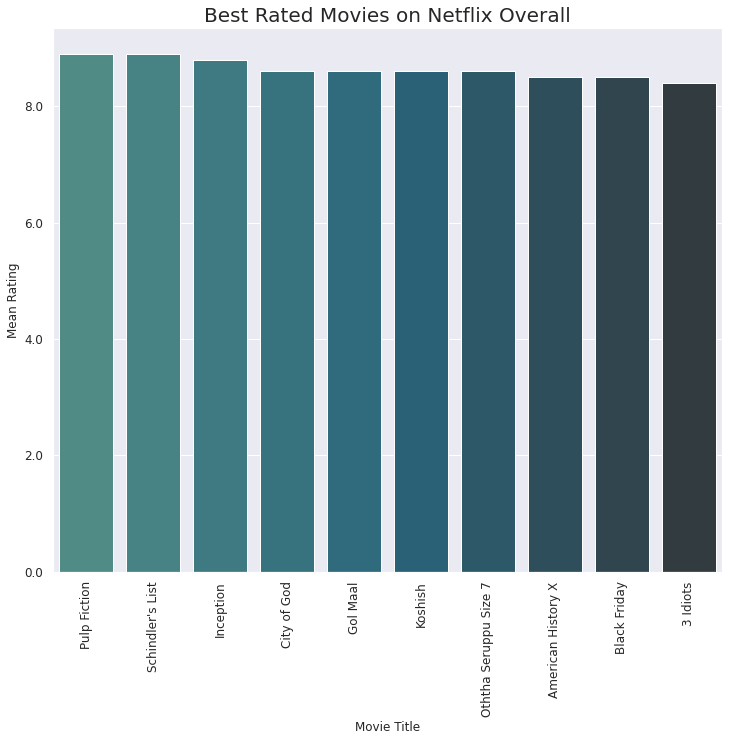

In [ ]:
top10('weighted_average_vote', ' Overall')

##Overall Top Rated Movies on Netflix - 8.9/10
###Best movies are Pulp Fiction and Sc


1 . Inception : 7.846726190476191
2 . Pulp Fiction : 7.695875383940324
3 . Django Unchained : 7.232494758909853
4 . Schindler's List : 7.138138138138139
5 . Black Panther : 6.889891395154553
6 . Taxi Driver : 6.8578947368421055
7 . The Irishman : 6.766453674121406
8 . American Beauty : 6.6547550432276665
9 . American History X : 6.617306299782766
10 . The Social Network : 6.603886925795053


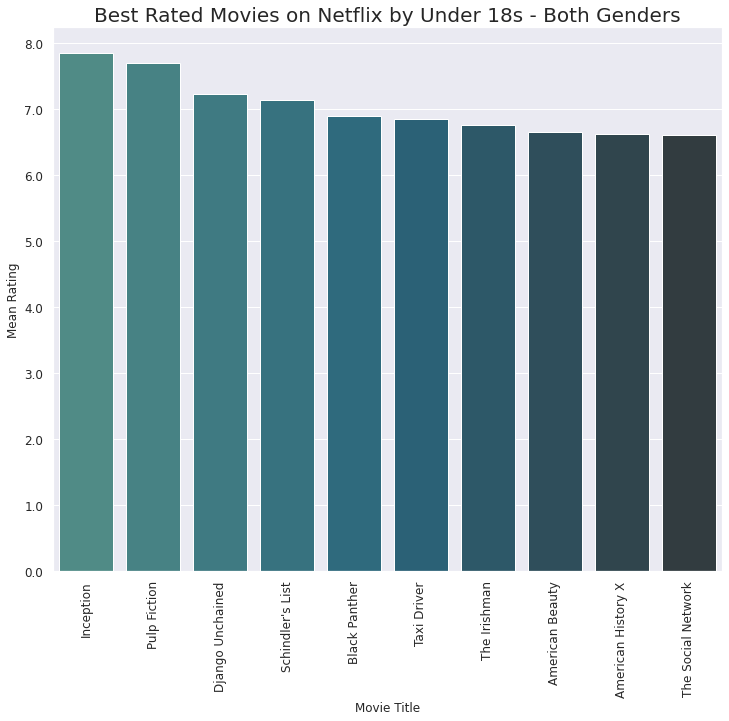

In [37]:
top10('weighted_allgenders_0age', ' by Under 18s - Both Genders')

#Top Rated Movie on Netflix by Under 18s - 7.8/10

##Best movie is Inception

#Top movies by genres

In [41]:
def genrestop10(genre_string, column, group):
    titles = []
    scores = []
    genre = []
    for i in range(len(merged)):
        row = merged.iloc[i]
        if genre_string in row['listed_in']:
            genre.append(row)
    genre = pd.DataFrame(genre)
    top10=genre[column].nlargest(10)
    for i in range(len(top10)):
        index = top10.index[i]
        score = top10.iloc[i]
        scores.append(score)
        title = merged['title'].iloc[index]
        titles.append(title)
        print(i+1, '.', title, ':', score)
    sns.set(rc={'figure.figsize':(12,10)})
    ax = sns.barplot(x=titles, y=scores, palette=("crest_d"))
    ticks = ax.set_xticklabels(titles, rotation=90, size = 12)
    ticks = ax.set_yticklabels(ax.get_yticks(), size = 12)
    ax.set(xlabel='Movie Title', ylabel='Mean Rating')
    ax.set_title('Best Rated ' + genre_string + ' on Netflix' + group, size= 20)
    return ax

#What is the best Horror movie on Netflix?

1 . The Blue Elephant 2 : 8.3
2 . Shutter : 7.1
3 . The Ring : 7.1
4 . Tremors : 7.1
5 . Cloverfield : 7.0
6 . Insidious : 6.8
7 . Final Destination : 6.7
8 . Phobia 2 : 6.7
9 . Bulbbul : 6.6
10 . Bhoot : 6.5


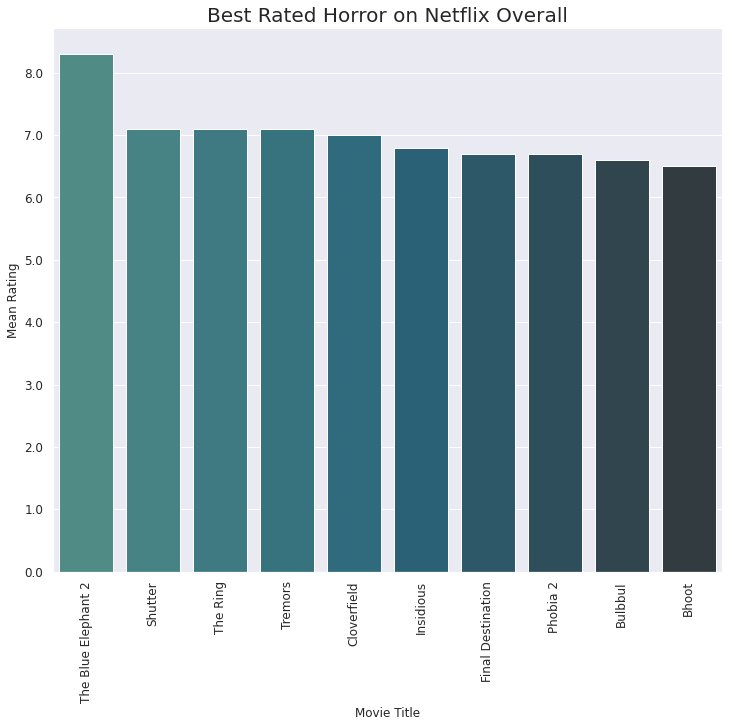

In [42]:
genrestop10('Horror', 'weighted_average_vote', ' Overall')

##Overall Top Rated Horror Movie on Netflix - 8.3/10
Best Horror movie is The Blue Elephant 2

#What are the best Comedy movies on Netflix?

1 . Gol Maal : 8.6
2 . 3 Idiots : 8.4
3 . Chupke Chupke : 8.3
4 . Andaz Apna Apna : 8.2
5 . Barfi! : 8.1
6 . Dil Chahta Hai : 8.1
7 . Trainspotting : 8.1
8 . Zindagi Na Milegi Dobara : 8.1
9 . Bawarchi : 8.0
10 . I Am Kalam : 8.0


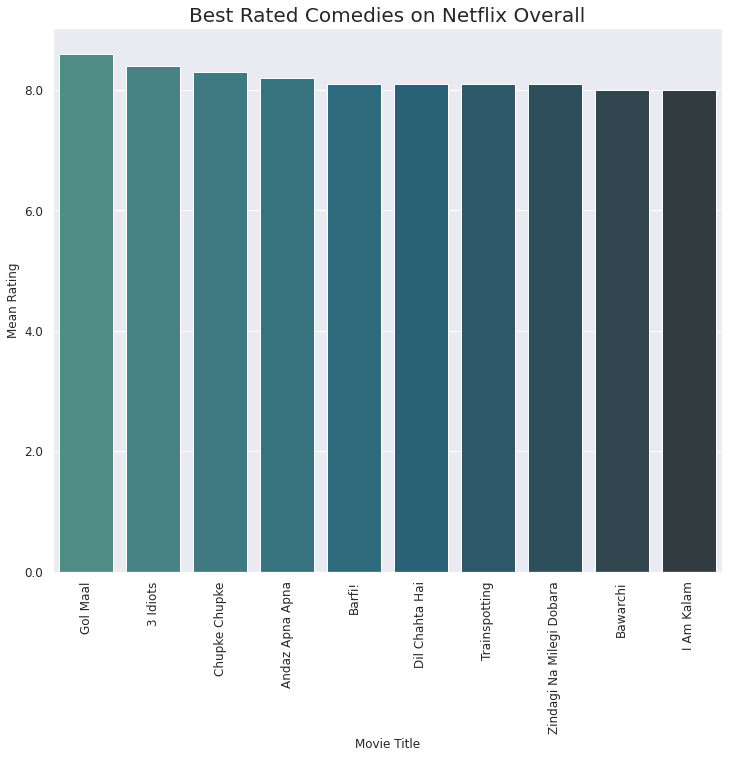

In [43]:
genrestop10('Comedies', 'weighted_average_vote', ' Overall')

#Overall Top Rated Comedy Movie on Netflix - 8.6/10
##Best Comdey movie is Golmal

#What are the best Family movies on Netflix?

1 . I Am Kalam : 8.0
2 . Miracle : 7.5
3 . The Blue Umbrella : 7.5
4 . Chillar Party : 7.4
5 . Tarzan : 7.3
6 . Mukhsin : 7.2
7 . Rango : 7.2
8 . Balto : 7.1
9 . ParaNorman : 7.0
10 . Penelope : 6.7


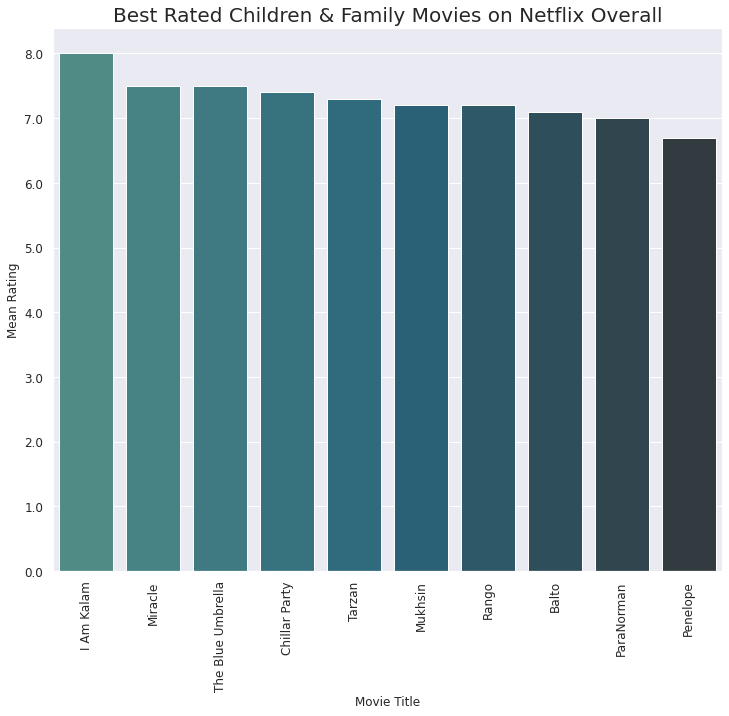

In [44]:
genrestop10('Children & Family Movies', 'weighted_average_vote', ' Overall')

##Overall Top Rated Family Movie on Netflix - 8/10
##Best Family movie is I am Kalam

#What are the best Romance movies on Netflix?

1 . Koshish : 8.6
2 . Sadma : 8.4
3 . Dev.D : 8.0
4 . Hazaaron Khwaishein Aisi : 7.9
5 . Kappela : 7.6
6 . Lolita : 7.6
7 . Stardust : 7.6
8 . Wake Up Sid : 7.6
9 . Blue Valentine : 7.4
10 . Across the Universe : 7.3


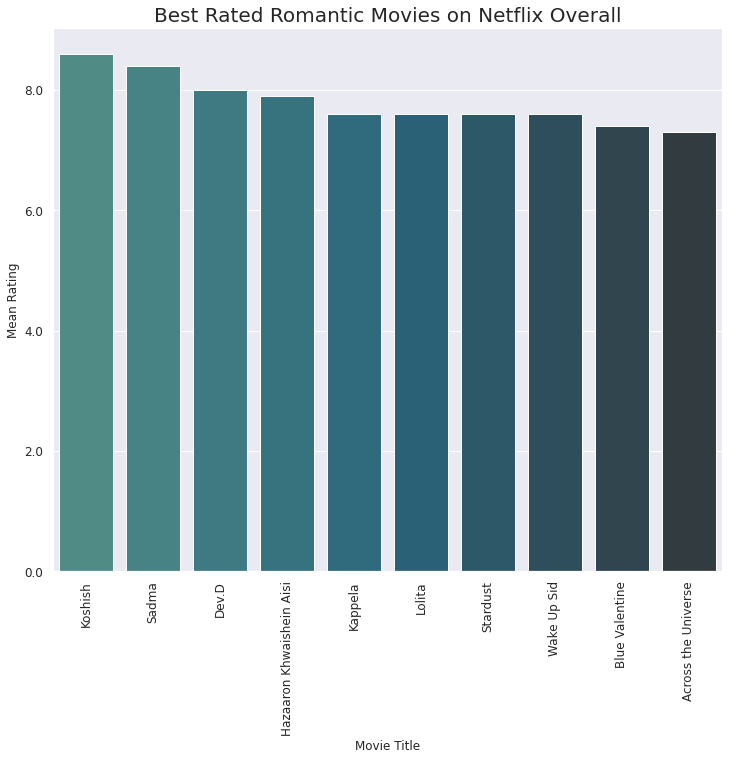

In [45]:
genrestop10('Romantic Movies', 'weighted_average_vote', ' Overall')

#Overall Top Rated Romance Movie on Netflix - 8.6/10
##Best Romance movie is Koshish

#What are the best Action movies on Netflix?

1 . Inception : 8.8
2 . Django Unchained : 8.4
3 . Andaz Apna Apna : 8.2
4 . A Wednesday : 8.1
5 . Platoon : 8.1
6 . Rocky : 8.1
7 . Casino Royale : 8.0
8 . Company : 8.0
9 . Ip Man : 8.0
10 . District 9 : 7.9


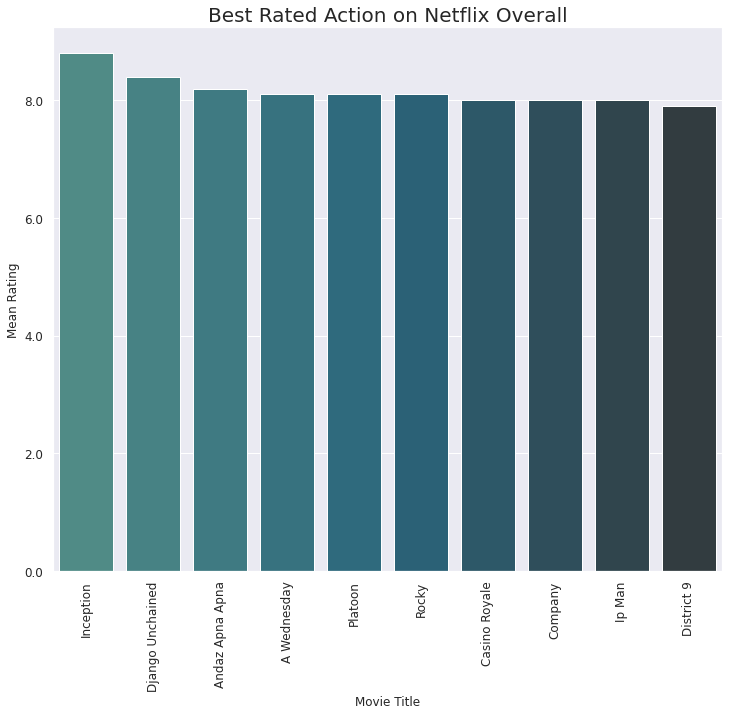

In [80]:
genrestop10('Action', 'weighted_average_vote', ' Overall')

##Overall Top Rated Action Movie on Netflix - 8.6/10
Best Action movie is Inception

#PYSPARK PREDICTIVE MODEL



In [ ]:
pip install pyspark

     |████████████████████████████████| 281.3 MB 35 kB/s 
     |████████████████████████████████| 198 kB 42.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=aa8d25e800b439a1a4e677bd32c36ae08d09c52f584d7779ef0bed382fc61c8e
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [ ]:
import pyspark 
from pyspark.sql import SparkSession

In [ ]:
merged.to_csv('merged.csv')

In [ ]:
spark = SparkSession \
    .builder \
    .appName("merged") \
    .getOrCreate()

In [ ]:
spark.version

'3.2.0'

In [ ]:
df = spark.read.csv('merged.csv')

In [ ]:
df.show(10)

+----+------------------+----+--------------------+--------------------+-------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| _c0|               _c1| _c2|                 _c3|                 _c4|          _c5|                 _c6|                 _c7|                 _c8|                 _c9|                _c10|                _c11|               _c12|                _c13|                _c14|                _c15|                _c16|                _c17|                _c18|                _c19|                _c20|
+----+------------------+----+--------------------+--------------------+-------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------

In [ ]:
df.cache()
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)
 |-- _c20: string (nullable = true)



In [ ]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
_c0,620,309.5,179.12286286233814,0,99
_c1,621,650.0,1099.8686285188792,1920,Æon Flux
_c2,621,2006.4822580645161,10.602283172184332,1958,year
_c3,621,None,None,Action & Adventure,listed_in
_c4,621,None,None,Argentina,country
_c5,621,None,None,imdb_title_id,tt2218003
_c6,621,6.329838709677414,1.1747463782039682,2.1,weighted_average_vote
_c7,621,4.420264734961529,2.6143872557708456,0.0,weighted_allgenders_0age
_c8,621,6.356801983648285,0.8271516824147561,3.2105538140020897,weighted_allgenders_18age


In [ ]:
train, test = df.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 440
Test Dataset Count: 181


In [ ]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'labes', maxIter=5)


In [ ]:
merged.head(5)

,title,year,listed_in,country,imdb_title_id,weighted_average_vote,weighted_allgenders_0age,weighted_allgenders_18age,weighted_allgenders_30age,weighted_allgenders_45age,weighted_males_allages,weighted_males_0age,weighted_males_18age,weighted_males_30age,weighted_males_45age,weighted_females_allages,weighted_females_0age,weighted_females_18age,weighted_females_30age,weighted_females_45age
0,23:59,2011,"Horror Movies, International Movies",Singapore,tt2100376,4.6,5.895105,5.725088,5.623970,5.689465,5.421659,5.895105,5.776147,5.646372,5.693849,5.795048,0.000000,5.847449,5.864440,5.878035
1,9,2009,"Action & Adventure, Independent Movies, Sci-Fi...",United States,tt0472033,7.1,5.981640,7.055726,6.984109,7.017298,6.988049,5.960399,7.041855,6.980945,7.004966,7.136228,5.916568,7.104086,7.089831,6.711645
2,21,2008,Dramas,United States,tt0478087,6.8,5.936641,6.979383,6.693032,6.562246,6.794374,5.918041,6.973781,6.691813,6.556476,6.867851,5.910704,6.997119,6.747093,6.518838
3,1920,2008,"Horror Movies, International Movies, Thrillers",India,tt1301698,6.4,5.904096,6.177766,6.109886,5.840917,6.233666,5.904096,6.166667,6.100100,5.825953,5.934025,0.000000,5.927410,5.891158,5.908738
4,Æon Flux,2005,"Action & Adventure, Sci-Fi & Fantasy",United States,tt0402022,5.5,5.876529,5.432285,5.407310,5.709869,5.405627,5.875248,5.440994,5.310312,5.711280,5.806063,5.904382,5.900000,5.719010,5.900000


Index(['title', 'year', 'listed_in', 'country', 'imdb_title_id',
       'weighted_average_vote', 'weighted_allgenders_0age',
       'weighted_allgenders_18age', 'weighted_allgenders_30age',
       'weighted_allgenders_45age', 'weighted_males_allages',
       'weighted_males_0age', 'weighted_males_18age', 'weighted_males_30age',
       'weighted_males_45age', 'weighted_females_allages',
       'weighted_females_0age', 'weighted_females_18age',
       'weighted_females_30age', 'weighted_females_45age'],
      dtype='object')

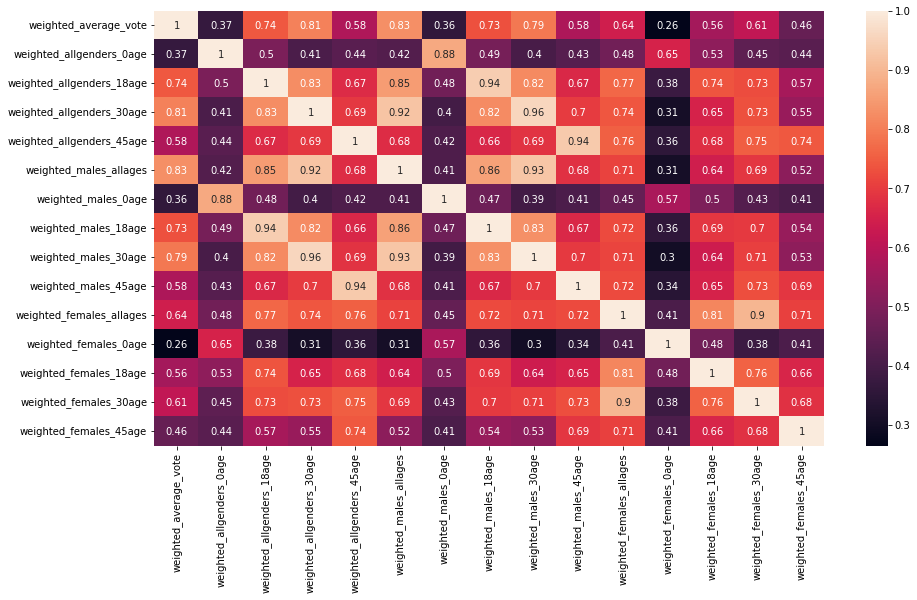

In [ ]:
corr = merged.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
merged.columns

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
x = merged.iloc[:,[5,7,8]]
y = merged['year']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()

,weighted_average_vote,weighted_allgenders_18age,weighted_allgenders_30age
499,6.6,5.908611,5.927410
528,6.5,6.623604,6.436238
282,4.4,5.526393,4.913523
534,7.0,6.942824,6.873924
74,5.4,5.859516,5.781541


In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test) 

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.08898740827314378

In [ ]:
from sklearn.tree import DecisionTreeRegressor


DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

-0.8107394832859676

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)

r2_score(y_test,y_predict)

-0.03774870931205765

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 200)
xgb.fit(x_train, y_train)
y_predict=xgb.predict(x_test)

r2_score(y_test,y_predict)


[23:06:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


-0.07176973230292982